In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pefile==2019.4.18

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [7]:
# Input Dataset 

DM = pd.read_csv("C:\\Users\\Muhammad Raihan\\Downloads\\Obfuscated-MalMem2022.csv") #DM--> Dataset Malware

In [8]:
# Menapilkan head (5 Data Teratas)

DM.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [9]:
# Menampilkan Tail (5 Data Terbawah)

DM.tail()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [10]:
# Menampilkan nama Kolom yang ada pada dataset

DM.columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [11]:
# Menampilkan Kesimpulan Atribut Numerik

DM.describe(include="all")

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
count,58596,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000,58596
unique,28346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,29298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29298
mean,NaN,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,...,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881,NaN
std,NaN,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,...,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929,NaN
min,NaN,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,...,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000,NaN
25%,NaN,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,...,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000,NaN
50%,NaN,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,...,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000,NaN
75%,NaN,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,...,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000,NaN


In [12]:
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [13]:
DM["Class"].value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

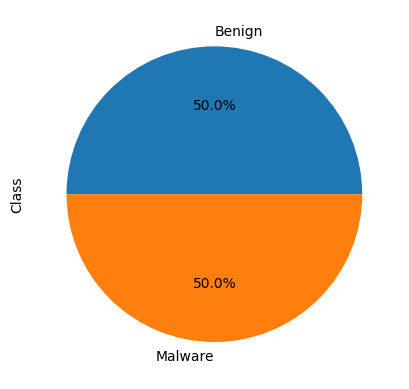

In [14]:
#Visualisasi

DM["Class"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [15]:
#Memisahkan data benign dan data malwares
BenignData = DM[DM['Class'] == "Benign"]
MalwareData = DM[DM['Class'] == "Malware"]

<function matplotlib.pyplot.show(close=None, block=None)>

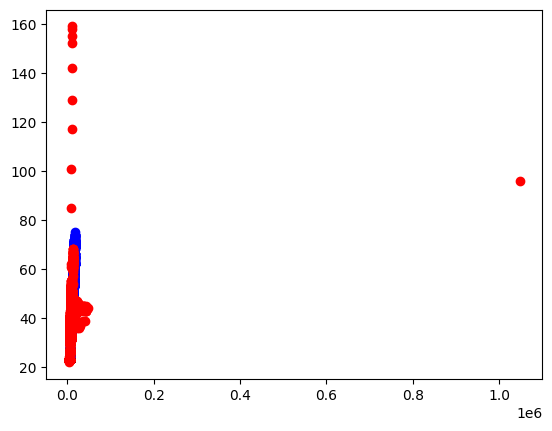

In [16]:
# Scatter Plot perbandingan antara Jumlah Handles dan Jumlah Desktop pada sistem
plt.scatter(BenignData["handles.nhandles"],BenignData["handles.ndesktop"], color = "blue")
plt.scatter(MalwareData["handles.nhandles"],MalwareData["handles.ndesktop"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

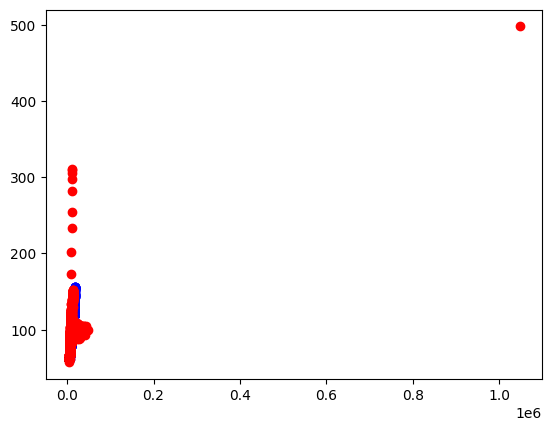

In [17]:
# Scatter Plot perbandingan antara Jumlah Handles dan Jumlah direktori pada sistem
plt.scatter(BenignData["handles.nhandles"],BenignData["handles.ndirectory"], color = "blue")
plt.scatter(MalwareData["handles.nhandles"],MalwareData["handles.ndirectory"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

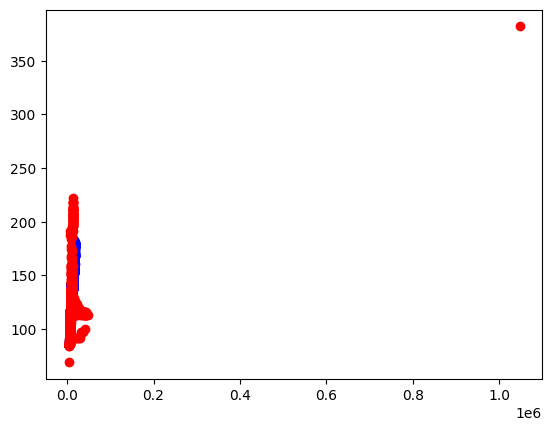

In [18]:
# Scatter Plot perbandingan antara Jumlah Handles dan Jumlah waktu penanganannya
plt.scatter(BenignData["handles.nhandles"],BenignData["handles.ntimer"], color = "blue")
plt.scatter(MalwareData["handles.nhandles"],MalwareData["handles.ntimer"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

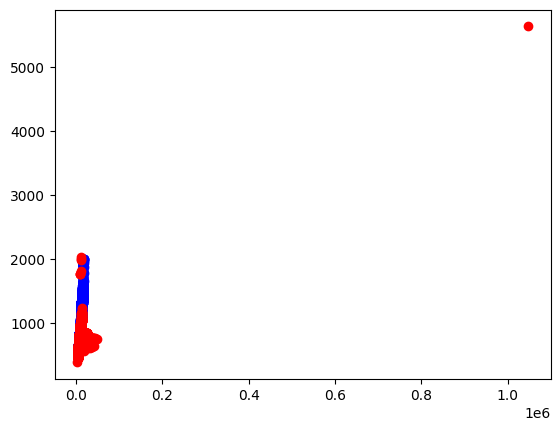

In [19]:
# Scatter Plot perbandingan antara Jumlah Handles dan jumlah thread yang dihandle oleh suatu proses atau sistem.
plt.scatter(BenignData["handles.nhandles"],BenignData["handles.nthread"], color = "blue")
plt.scatter(MalwareData["handles.nhandles"],MalwareData["handles.nthread"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

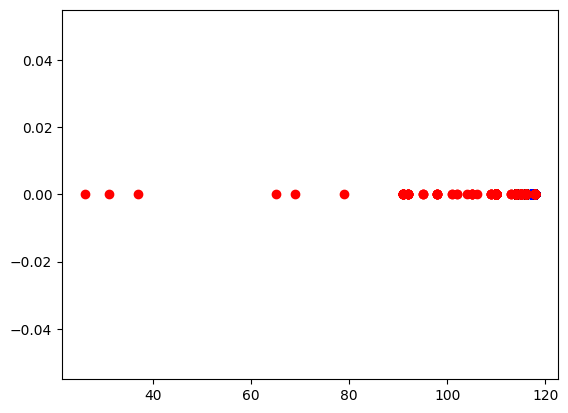

In [20]:
# Scatter Plot perbandingan antara jumulah pemindaian layanan yang terkait dengan proses bersama dan jumlah hasilnya.
plt.scatter(BenignData["svcscan.shared_process_services"],BenignData["svcscan.interactive_process_services"], color = "blue")
plt.scatter(MalwareData["svcscan.shared_process_services"],MalwareData["svcscan.interactive_process_services"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

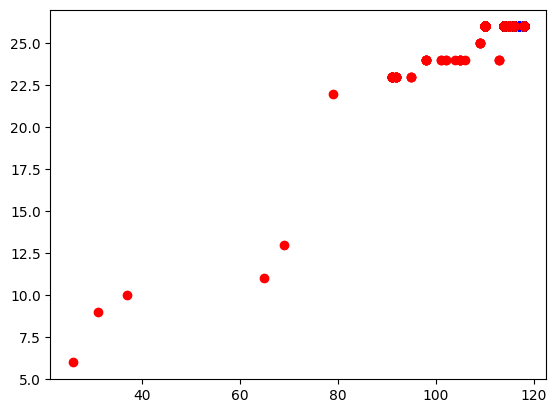

In [21]:
# Scatter Plot perbandingan antara jumulah pemindaian layanan yang terkait dengan proses bersama dan jumlah hasilnya berhubungan dengan file system.
plt.scatter(BenignData["svcscan.shared_process_services"],BenignData["svcscan.fs_drivers"], color = "blue")
plt.scatter(MalwareData["svcscan.shared_process_services"],MalwareData["svcscan.fs_drivers"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

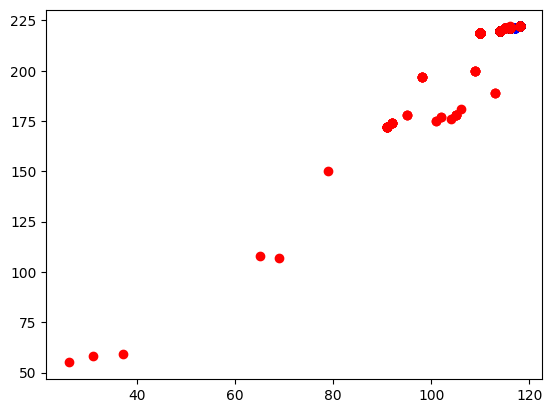

In [22]:
# Scatter Plot perbandingan antara jumulah pemindaian layanan yang terkait dengan proses bersama dan jumlah hasilnya berhubungan dengan karnel pada sistem.
plt.scatter(BenignData["svcscan.shared_process_services"],BenignData["svcscan.kernel_drivers"], color = "blue")
plt.scatter(MalwareData["svcscan.shared_process_services"],MalwareData["svcscan.kernel_drivers"], color = "red")
plt.show

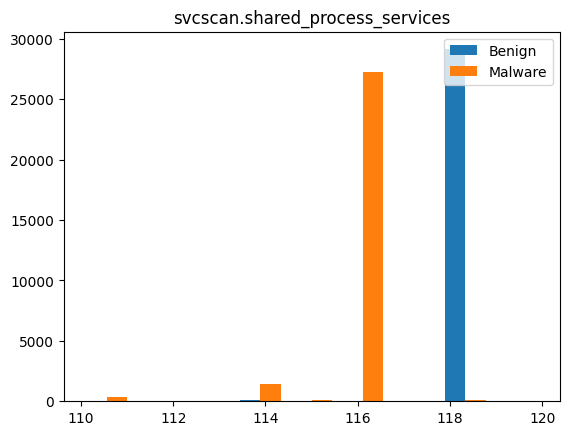

In [23]:
# Histogram perbandingan antara jumlah pemindaian layanan yang terkait dengan proses bersama di benign dan malware.
x = BenignData["svcscan.shared_process_services"]
y = MalwareData["svcscan.shared_process_services"]
bins = np.linspace(110, 120, 10)

plt.title("svcscan.shared_process_services")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

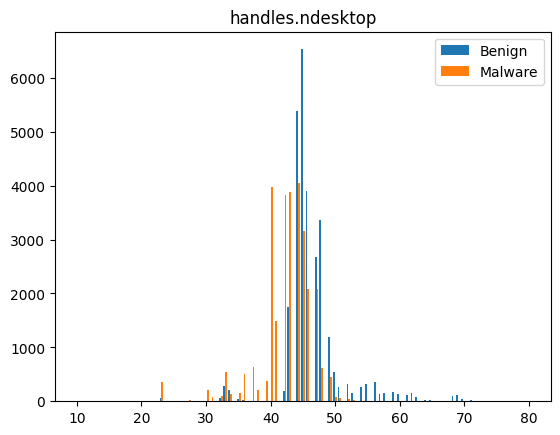

In [24]:
# Histogram perbandingan antara jumlah desktop pada handles di benign dan malware.
x = BenignData["handles.ndesktop"]
y = MalwareData["handles.ndesktop"]
bins = np.linspace(10, 80, 100)

plt.title("handles.ndesktop")
plt.hist([x, y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

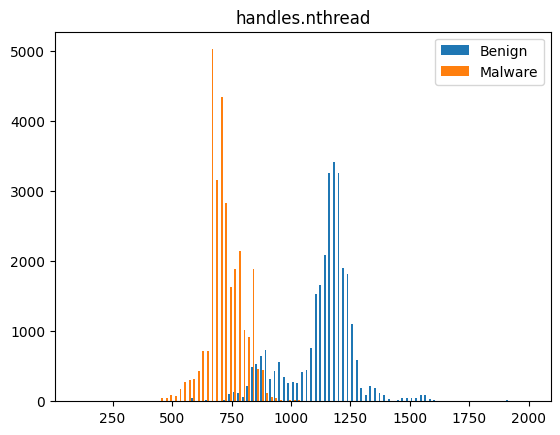

In [25]:
# Histogram perbandingan antara jumlah thread pada handles di benign dan malware.
x = BenignData["handles.nthread"]
y = MalwareData["handles.nthread"]
bins = np.linspace(100, 2000, 100)

plt.title("handles.nthread")
plt.hist([x, y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

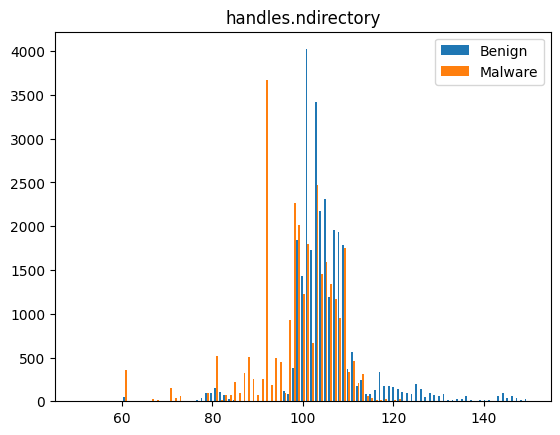

In [26]:
# Histogram perbandingan antara jumlah direktori pada handles di benign dan malware.
x = BenignData["handles.ndirectory"]
y = MalwareData["handles.ndirectory"]
bins = np.linspace(50, 150, 100)

plt.title("handles.ndirectory")
plt.hist([x, y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

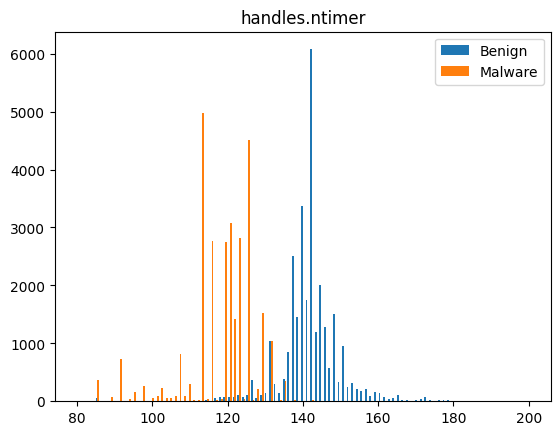

In [27]:
# Histogram perbandingan antara jumlah waktu pada handles di benign dan malware.
x = BenignData["handles.ntimer"]
y = MalwareData["handles.ntimer"]
bins = np.linspace(80,200, 100)
plt.title("handles.ntimer")
plt.hist([x, y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [28]:
#THRESHOLDING awal dengan fitur svcscan.shared_process_services

# Waktu awal training
import time
start_time = time.time()

# Melakukan thresholding
BenignDataThreshold = DM[DM["svcscan.shared_process_services"] > 117]
MalwareDataThreshold = DM[DM["svcscan.shared_process_services"] <= 117]

# Waktu akhir training
end_time = time.time()

# menentukan TP, TN, FP, FN
from sklearn.metrics import confusion_matrix

# Untuk BenignDataThreshold
y_true_benign = ["Benign"] * len(BenignDataThreshold)
y_pred_benign = BenignDataThreshold["Class"]

# Untuk MalwareDataThreshold
y_true_malware = ["Malware"] * len(MalwareDataThreshold)
y_pred_malware = MalwareDataThreshold["Class"]

# Menyatukan true labels dan predicted labels
y_true = y_true_benign + y_true_malware
y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

# Menghitung confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

print("")

# Menghitung Precision, Recall, F1-score, dan Accuracy

PrecisionThreshold = tp/(tp+fp)
RecallThreshold = tp/(tp+fn)
F1ScoreThreshold = 2 * ((PrecisionThreshold*RecallThreshold)/(PrecisionThreshold+RecallThreshold))
AccuracyThreshold = (tp+tn)/(tp+fp+tn+fn)

# Mengambil satu baris dari dataset untuk pengujian
testData = DM.sample(n=1, random_state=42)

# Waktu awal test
start_time_test = time.time()

if testData["svcscan.shared_process_services"].values[0] > 117:
    predTest = 'Benign'
else:
    predTest = 'Malware'

if predTest == testData['Class'].values[0]:
    print("Test Benar")
else:
    print("Test Salah")

# Waktu akhir test
end_time_test = time.time()

print("Precision:", PrecisionThreshold)
print("Recall:", RecallThreshold)
print("F1-Score:", F1ScoreThreshold)
print("Accuracy:", AccuracyThreshold)

# Menghitung total waktu training
training_time = end_time - start_time
print("Total Training Time:", training_time, "seconds")

# Menghitung total waktu test
test_time = end_time_test - start_time_test
print("Total Testing Time:", test_time, "seconds")

True Negative: 29120
False Positive: 69
False Negative: 178
True Positive: 29229

Test Benar
Precision: 0.9976448904362073
Recall: 0.9939470194171456
F1-Score: 0.9957925219316924
Accuracy: 0.9957846952010376
Total Training Time: 0.013039112091064453 seconds
Total Testing Time: 0.0 seconds


In [29]:
# Mencoba mencari threshold terbaik pada fitur svcscan.shared_process_services
hasil_threshold = []

def Thresholding(threshold):
    # Melakukan thresholding
    BenignDataThreshold = DM[DM["svcscan.shared_process_services"] > int(threshold)]
    MalwareDataThreshold = DM[DM["svcscan.shared_process_services"] <= int(threshold)]

    # menentukan TP, TN, FP, FN
    from sklearn.metrics import confusion_matrix

    # Untuk BenignDataThreshold
    y_true_benign = ["Benign"] * len(BenignDataThreshold)
    y_pred_benign = BenignDataThreshold["Class"]

    # Untuk MalwareDataThreshold
    y_true_malware = ["Malware"] * len(MalwareDataThreshold)
    y_pred_malware = MalwareDataThreshold["Class"]

    # Menyatukan true labels dan predicted labels
    y_true = y_true_benign + y_true_malware
    y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    #print("True Negative:", tn)
    #print("False Positive:", fp)
    #print("False Negative:", fn)
    #print("True Positive:", tp)

    #print("")

    # Menghitung Precision, Recall, F1-score, dan Accuracy

    PrecisionThreshold = tp/(tp+fp)
    RecallThreshold = tp/(tp+fn)
    F1ScoreThreshold = 2 * ((PrecisionThreshold*RecallThreshold)/(PrecisionThreshold+RecallThreshold))
    AccuracyThreshold = (tp+tn)/(tp+fp+tn+fn)

    #print("Precision:", PrecisionThreshold)
    #print("Recall:", RecallThreshold)
    #print("F1-Score:", F1ScoreThreshold)
    #print("Accuracy:", AccuracyThreshold)

    matrix = [[threshold],[PrecisionThreshold],[RecallThreshold],[F1ScoreThreshold],[AccuracyThreshold]]
    hasil_threshold.append(matrix)


Max = DM['svcscan.shared_process_services'].max()
Min = DM['svcscan.shared_process_services'].min()

for x in range(Min,Max+1):
    Thresholding(x)

print(hasil_threshold)

[[[26], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[27], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[28], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[29], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[30], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[31], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[32], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[33], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[34], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[35], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[36], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[37], [0.00010239606799098914], [1.0], [0

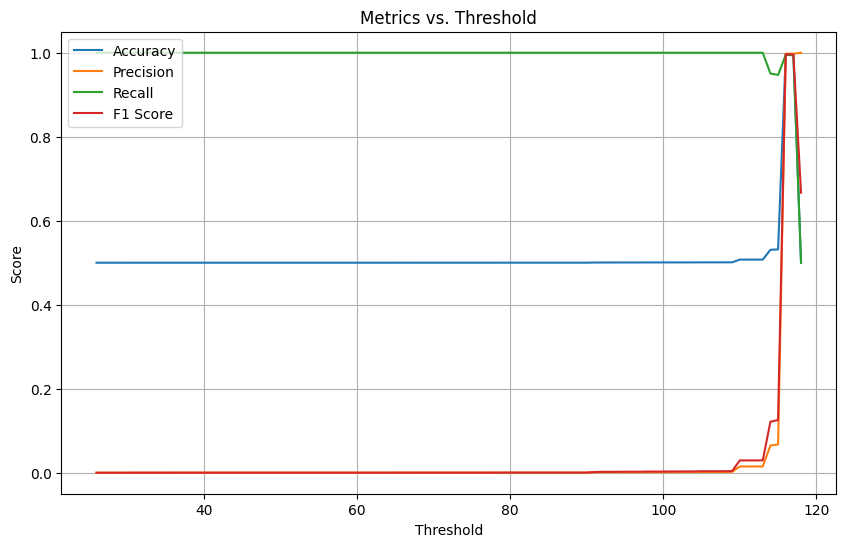

In [30]:
#Plot, sumbu x treshold dan sumbu y nya akurasinya
# Pisahkan hasil menjadi list berdasarkan kolom
thresholds, precision, recall, f1_score, accuracy = zip(*hasil_threshold)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, f1_score, label='F1 Score')

plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
winner = [[0],[0],[0],[0],[0]]
for x in range(0,(len(hasil_threshold)-1)):
    i = hasil_threshold[x]
    if i[4] >= winner[4]:
        winner = i

print("Dengan menggunakan threshold ",winner[0]," menghasilkan presisi ",winner[1],", lalu Recall ", winner[2], ", F1-score ",winner[3],", dan Akurasi ", winner[4], " yang menjadikan angka threshold tersebut adalah threshold terbaik yang dapat digunakan.")

Dengan menggunakan threshold  [116]  menghasilkan presisi  [0.9976448904362073] , lalu Recall  [0.9950297872340426] , F1-score  [0.996335622858896] , dan Akurasi  [0.9963308075636562]  yang menjadikan angka threshold tersebut adalah threshold terbaik yang dapat digunakan.


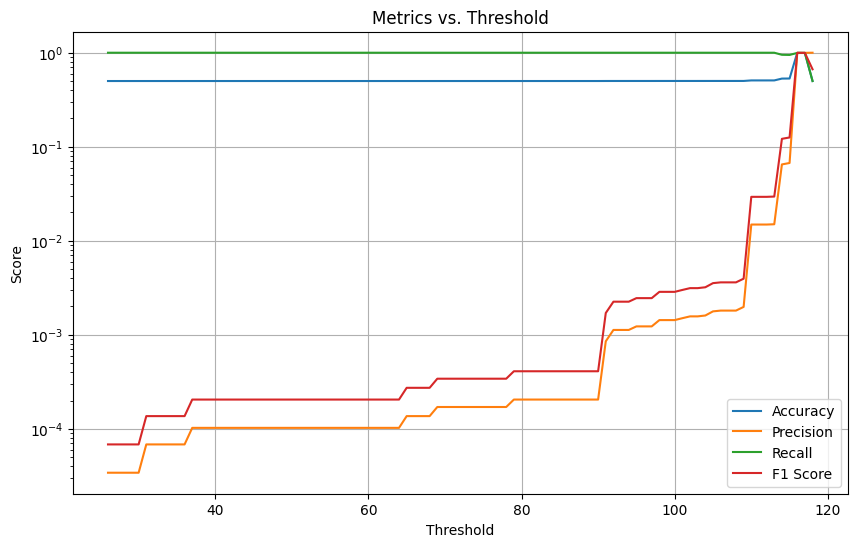

In [32]:
# Plotting with log scale on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, f1_score, label='F1 Score')

plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.yscale('log')  # Set log scale on the y-axis
plt.grid(True)
plt.show()